# ${\textbf{G2: META Read Hs from SAR}}$  
In this Notebook, we perform scatterplots of SARWAVE $H_s$ against KaRIn $H_s$.  
We first read the dataframe containing 
We discriminate on different available SWOT file versions (PIC0&PGC0, PIC2) and on different IW.  


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import SWOT_tools as st
import xarray as xr
import shapefile as shp 
import os
from datetime import datetime
from tqdm import tqdm
from scipy.interpolate import griddata
from scipy.ndimage import binary_dilation

import pandas as pd
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})

In [2]:
import matplotlib.font_manager as fm
# Regular and bold font paths
font_regular_path = "fonts/times/times.ttf"
font_bold_path = "fonts/times/timesbd.ttf"  # Bold
# Register both fonts
fm.fontManager.addfont(font_regular_path)
fm.fontManager.addfont(font_bold_path)
# Create font properties
font_regular = fm.FontProperties(fname=font_regular_path)
font_bold = fm.FontProperties(fname=font_bold_path)
# Set default font to regular Times New Roman
plt.rcParams['font.family'] = font_regular.get_name()

# ${\small \textbf{Loading colocations with already processed IWs \&  SWOT files}}$

In [3]:
df_coloc = pd.read_csv("G_df/df_colocs_swot_S1.csv")
df_coloc

,Unnamed: 0,year,day_of_year,swot_file,iw_file
0,0,2023.0,263.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
1,1,2023.0,263.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
2,2,2023.0,263.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
3,0,2023.0,263.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
4,1,2023.0,263.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
...,...,...,...,...,...
10813,1,2025.0,1.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
10814,2,2025.0,1.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
10815,0,2025.0,1.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN
10816,1,2025.0,1.0,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,NaN


In [4]:
df_hs = pd.read_csv("G_df/df_hs_with_iw_files.csv")
df_hs

,Unnamed: 0,hs_swot_on_iw,hsml_iw,conf_iw,swot_file,iw_file,lon,lat,lon_map_min,lon_map_max,lat_map_min,lat_map_max
0,0,1.797397,1.826495,0.207324,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,12.557643,73.691120,9.450133,18.094831,71.80096,73.81610
1,1,1.590965,1.673310,0.143945,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,12.247163,73.711610,9.450133,18.094831,71.80096,73.81610
2,2,1.582535,1.825399,0.221251,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,12.091585,73.721690,9.450133,18.094831,71.80096,73.81610
3,3,1.610515,1.451219,0.147597,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,11.935920,73.731636,9.450133,18.094831,71.80096,73.81610
4,4,1.692440,1.683065,0.292234,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,11.780002,73.741470,9.450133,18.094831,71.80096,73.81610
...,...,...,...,...,...,...,...,...,...,...,...,...
109677,104,1.605163,1.913380,-0.143810,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,21.239656,72.661255,15.348085,23.298555,70.83409,72.73282
109678,105,1.736785,1.684659,-0.100082,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,21.386560,72.670580,15.348085,23.298555,70.83409,72.73282
109679,106,1.779557,2.264003,-0.252275,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,21.533638,72.679790,15.348085,23.298555,70.83409,72.73282
109680,0,1.384500,2.270848,-0.150540,/home/datawork-WW3/PROJECT/SWOT/WindWave/SWOT_...,/home/datawork-cersat-public/cache/project/sar...,20.160107,72.654320,15.348085,23.298555,70.83409,72.73282


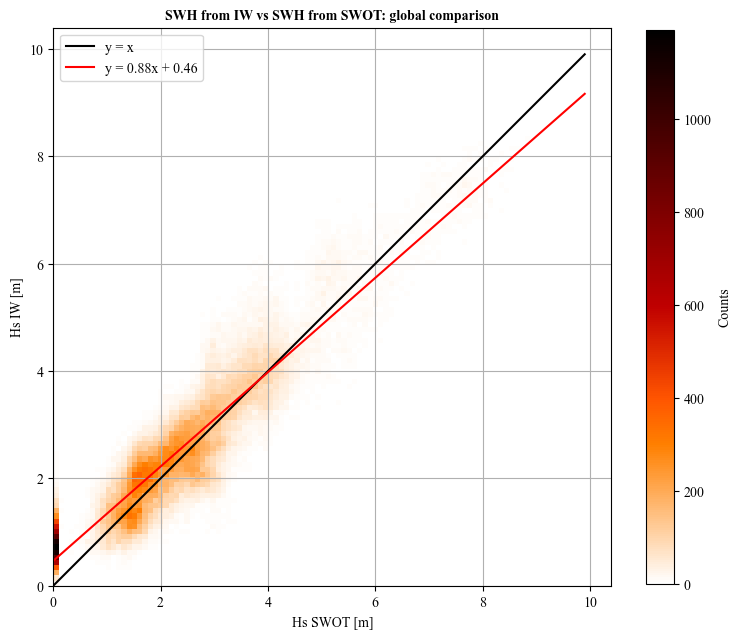

In [5]:
#df_hs = pd.read_csv("df_hs.csv")

all_hs_swot = df_hs["hs_swot_on_iw"].values
all_hs_iw = df_hs["hsml_iw"].values


x_obs, y_obs = all_hs_swot, all_hs_iw
#y_obs_2 = MEAN_HSML_CONFIDENT_clean

fig = plt.figure(figsize=(9,9))
#plt.scatter(x_obs, y_obs, color="red", marker = "x")
#plt.scatter(x_obs, y_obs_2, color="green", marker = "x")

# DENSITY SCATTERPLOT REPLACEMENT
plt.hist2d(x_obs, y_obs, bins=100, cmap='gist_heat_r')#, norm=plt.cm.colors.LogNorm())  # log scale for better visibility
plt.colorbar(label='Counts', shrink=0.8)


x_id, y_id = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)

plt.plot(x_id, y_id, color="black", label="y = x")

coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
a, b = coeffs[0], coeffs[1]


if b > 0:
    plt.plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x + {round(b,2)}")
else: 
    plt.plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x - {round(abs(b),2)}")


plt.grid()
plt.axis('scaled')
plt.title("SWH from IW vs SWH from SWOT: global comparison", fontproperties=font_bold)# \n Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(pretitle, dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted))
#fig.text(0.5, 0.875, " Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted), ha='center', fontsize=11)
plt.xlabel("Hs SWOT [m]")
plt.ylabel("Hs IW [m]")
#plt.xlim(min_xx,max_xx)
#plt.ylim(min_xx,max_xx)
#plt.xlim(hs_min,hs_max)
#plt.ylim(hs_min,hs_max)
plt.legend()
plt.show()




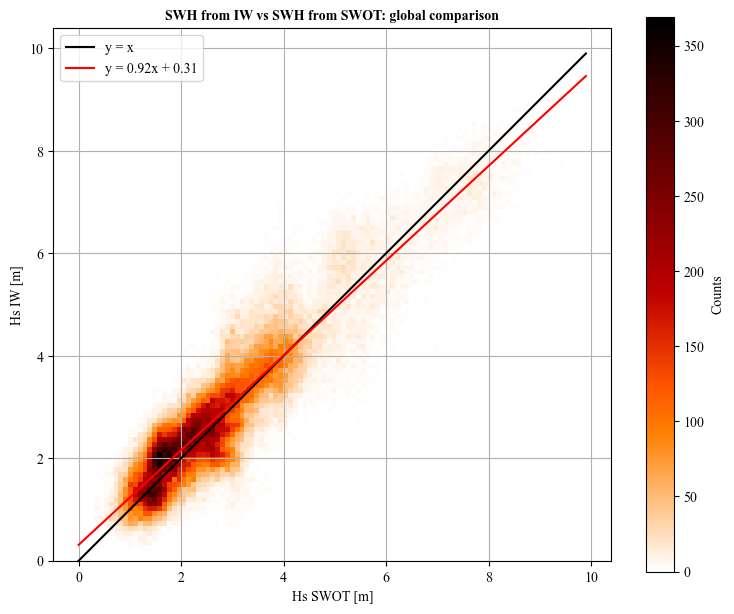

In [6]:
df_hs_no_0 = df_hs.loc[df_hs["hs_swot_on_iw"] >= 0.3]
df_hs_no_0.shape


all_hs_swot = df_hs_no_0["hs_swot_on_iw"].values
all_hs_iw = df_hs_no_0["hsml_iw"].values


x_obs, y_obs = all_hs_swot, all_hs_iw
#y_obs_2 = MEAN_HSML_CONFIDENT_clean

fig = plt.figure(figsize=(9,9))
#plt.scatter(x_obs, y_obs, color="red", marker = "x")
#plt.scatter(x_obs, y_obs_2, color="green", marker = "x")

# DENSITY SCATTERPLOT REPLACEMENT
plt.hist2d(x_obs, y_obs, bins=100, cmap='gist_heat_r')#norm=plt.cm.colors.LogNorm())  # log scale for better visibility
plt.colorbar(label='Counts', shrink=0.8)


x_id, y_id = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)

plt.plot(x_id, y_id, color="black", label="y = x")

coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
a, b = coeffs[0], coeffs[1]


if b > 0:
    plt.plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x + {round(b,2)}")
else: 
    plt.plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x - {round(abs(b),2)}")


plt.grid()
plt.axis('scaled')
plt.title("SWH from IW vs SWH from SWOT: global comparison", fontproperties=font_bold)# \n Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(pretitle, dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted))
#fig.text(0.5, 0.875, " Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted), ha='center', fontsize=11)
plt.xlabel("Hs SWOT [m]")
plt.ylabel("Hs IW [m]")
#plt.xlim(min_xx,max_xx)
#plt.ylim(min_xx,max_xx)
#plt.xlim(hs_min,hs_max)
#plt.ylim(hs_min,hs_max)
plt.legend()
plt.savefig("coloc_scatter_plot.png")
plt.show()

# Listing size of different SWOT file types

In [7]:
df_hs_PGC0 = df_hs_no_0.loc[df_hs_no_0["swot_file"].str.contains("PGC0", na=False)]
df_hs_PGC0.shape

(22798, 12)

In [8]:
df_hs_PIC0 = df_hs_no_0.loc[df_hs_no_0["swot_file"].str.contains("PIC0", na=False)]
df_hs_PIC0.shape

(63922, 12)

In [9]:
df_hs_PID0 = df_hs_no_0.loc[df_hs_no_0["swot_file"].str.contains("PID0", na=False)]
df_hs_PID0.shape

(0, 12)

In [10]:
df_hs_PIC2 = df_hs_no_0.loc[df_hs_no_0["swot_file"].str.contains("PIC2", na=False)]
df_hs_PIC2.shape

(13900, 12)

# Scatterplot of Hs SARWAVE vs Hs SWOT depending on SWOT filetype

In [11]:
def pearson_correlation(x_obs, y_obs):
    x = np.array(x_obs)
    y = np.array(y_obs)
    
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    numerator = np.sum((x - x_bar) * (y - y_bar))
    denominator = np.sqrt(np.sum((x - x_bar)**2) * np.sum((y - y_bar)**2))

    if denominator == 0:
        raise ValueError("Denominator is zero; correlation is undefined.")
    
    return numerator / denominator

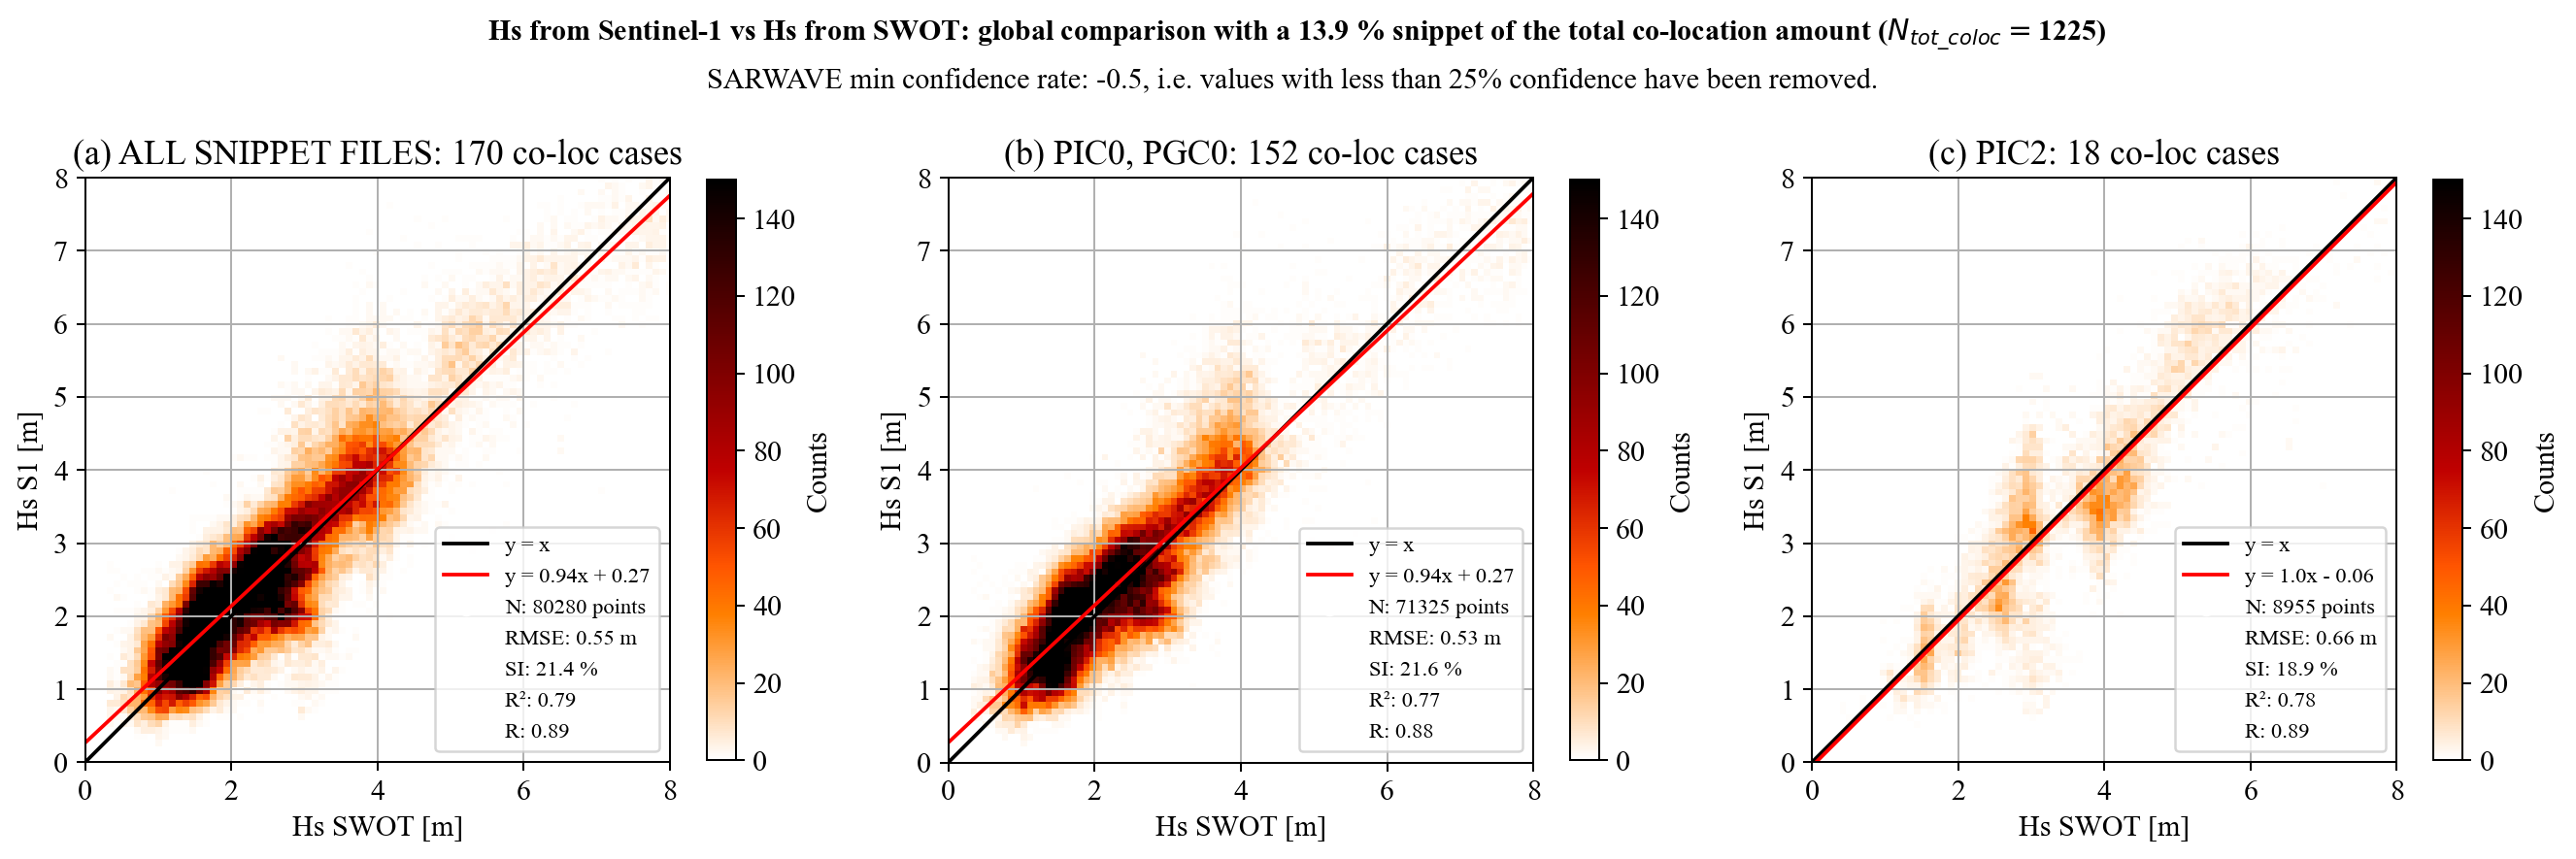

In [16]:
df_hs_no_0 = df_hs.loc[df_hs["hs_swot_on_iw"] >= 0.3]
conf_rate_min = -0.5
df_hs_no_0 = df_hs_no_0.loc[df_hs_no_0["conf_iw"] >= conf_rate_min]
N_tot_coloc = np.unique(df_coloc["swot_file"]).shape[0] 

plt.rcParams.update({'font.size': 12})  

fig, ax = plt.subplots(1,3, figsize = (15,5),dpi=180)
N_colocs = []

for i, SWOT_EXT in enumerate(["L2", "NO_PIC2", "PIC2"]):

    if SWOT_EXT != "NO_PIC2":
        df_hs_EXT = df_hs_no_0.loc[df_hs_no_0["swot_file"].str.contains(f"{SWOT_EXT}", na=False)]
    else:
        df_hs_EXT = df_hs_no_0.loc[~df_hs_no_0["swot_file"].str.contains(f"{SWOT_EXT[3:]}", na=False)]

        


    all_hs_swot = df_hs_EXT["hs_swot_on_iw"].values
    all_hs_iw = df_hs_EXT["hsml_iw"].values


    x_obs, y_obs = all_hs_swot, all_hs_iw

    R = pearson_correlation(x_obs, y_obs)
    RMSE = round(np.sqrt(np.mean((x_obs-y_obs)**2)),2)

    #y_obs_2 = MEAN_HSML_CONFIDENT_clean
    
    #plt.scatter(x_obs, y_obs, color="red", marker = "x")
    #plt.scatter(x_obs, y_obs_2, color="green", marker = "x")
    
    # DENSITY SCATTERPLOT REPLACEMENT
    _, _, _, imi = ax[i].hist2d(x_obs, y_obs, bins=100, cmap='gist_heat_r', vmin=0, vmax=150)
    fig.colorbar(imi, ax=ax[i], orientation='vertical', label='Counts', shrink=0.78)

    
    x_id, y_id = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)
    
    ax[i].plot(x_id, y_id, color="black", label="y = x")
    
    coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
    a, b = coeffs[0], coeffs[1]

    y_pred = a*x_obs+b
    R2 = round(1 - np.sum((y_obs - y_pred)**2) / np.sum((y_obs - np.mean(y_obs))**2), 2)

    N = x_obs.shape[0]

    SI = round(100* RMSE / np.mean(y_obs), 1)
    
    
    if b > 0:
        ax[i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x + {round(b,2)}")
    else: 
        ax[i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x - {round(abs(b),2)}")


    plt.rcParams.update({'font.size': 9})  
    ax[i].scatter(-1,-1, color="white", label=f"N: {N} points")    
    ax[i].scatter(-1,-1, color="white", label=f"RMSE: {RMSE} m")
    ax[i].scatter(-1,-1, color="white", label=f"SI: {SI} %")
    ax[i].scatter(-1,-1, color="white", label=f"R²: {R2}")
    ax[i].scatter(-1,-1, color="white", label=f"R: {round(R,2)}")
    ax[i].legend(loc="lower right")

    #ax[i].scatter(-1,-1, color="white", label=f"R²_p: {round(R**2,2)}")

    plt.rcParams.update({'font.size': 12})  
    ax[i].grid()
    ax[i].axis('scaled')
    ax[i].set_xlim(0,8)
    ax[i].set_ylim(0,8)
    ax[i].set_title(f"{SWOT_EXT}")
    #fig.text(0.5, 0.875, " Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted), ha='center', fontsize=11)
    ax[i].set_xlabel("Hs SWOT [m]")
    ax[i].set_ylabel("Hs S1 [m]")
    #plt.xlim(min_xx,max_xx)
    #plt.ylim(min_xx,max_xx)
    #plt.xlim(hs_min,hs_max)
    #plt.ylim(hs_min,hs_max)

    N_colocs.append(np.unique(df_hs_EXT["swot_file"]).shape[0])
    
ax[0].set_title(f"(a) ALL SNIPPET FILES: {N_colocs[0]} co-loc cases")
ax[1].set_title(f"(b) PIC0, PGC0: {N_colocs[1]} co-loc cases")
ax[2].set_title(f"(c) PIC2: {N_colocs[2]} co-loc cases")
fig.text(x=0.275, y=0.9,s=f"SARWAVE min confidence rate: {conf_rate_min}, i.e. values with less than {int(100*(conf_rate_min-(-1))/2)}% confidence have been removed.")
plt.suptitle(f"Hs from Sentinel-1 vs Hs from SWOT: global comparison with a {round(100*N_colocs[0]/N_tot_coloc,1)} % snippet of the total co-location amount (" + r"$N_{tot\_coloc} =$" + f"{N_tot_coloc})", fontproperties=font_bold, fontsize=12)# \n Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(pretitle, dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted))
plt.tight_layout()
plt.savefig(r"output_images/General_comparison_images/coloc_scatter_plot.png")
plt.show()

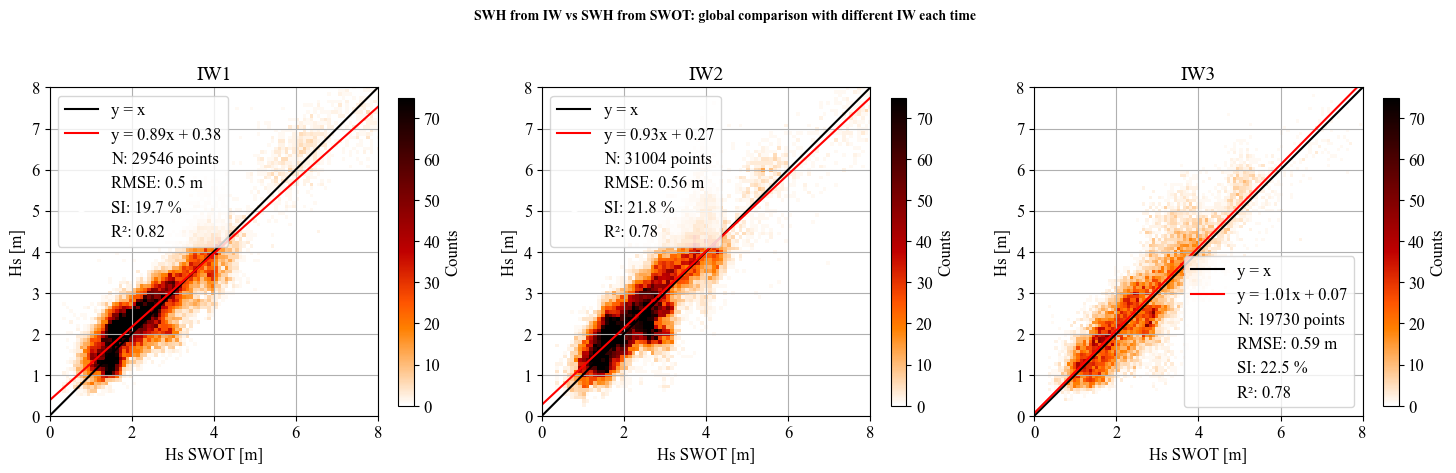

In [18]:
df_hs_iw = pd.read_csv("G_df/df_hs_with_iw_files.csv")

# Removing close to zero values
df_hs_iw = df_hs_iw.loc[df_hs_iw["hs_swot_on_iw"] >= 0.3]
conf_rate_min = -0.5
df_hs_iw = df_hs_iw.loc[df_hs_iw["conf_iw"] >= conf_rate_min]


iwi = "iw3"

fig, ax = plt.subplots(1,3, figsize = (18,5))

for i, iwi in enumerate(["iw1", "iw2", "iw3"]):

    df_hs_iw_i = df_hs_iw.loc[df_hs_iw["iw_file"].str.contains(f"{iwi}")]
        
    all_hs_swot = df_hs_iw_i["hs_swot_on_iw"].values
    all_hs_iw = df_hs_iw_i["hsml_iw"].values
    
    
    x_obs, y_obs = all_hs_swot, all_hs_iw

    RMSE = round(np.sqrt(np.mean((x_obs-y_obs)**2)),2)

    #y_obs_2 = MEAN_HSML_CONFIDENT_clean
    
    #plt.scatter(x_obs, y_obs, color="red", marker = "x")
    #plt.scatter(x_obs, y_obs_2, color="green", marker = "x")
    
    # DENSITY SCATTERPLOT REPLACEMENT
    _, _, _, imi = ax[i].hist2d(x_obs, y_obs, bins=100, cmap='gist_heat_r',  vmin=0, vmax=75)
    fig.colorbar(imi, ax=ax[i], orientation='vertical', label='Counts', shrink=0.8)

    
    x_id, y_id = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)
    
    ax[i].plot(x_id, y_id, color="black", label="y = x")
    
    coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
    a, b = coeffs[0], coeffs[1]

    y_pred = a*x_obs+b
    R2 = round(1 - np.sum((y_obs - y_pred)**2) / np.sum((y_obs - np.mean(y_obs))**2), 2)

    N = x_obs.shape[0]

    SI = round(100* RMSE / np.mean(y_obs), 1)
    
    
    if b > 0:
        ax[i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x + {round(b,2)}")
    else: 
        ax[i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x - {round(abs(b),2)}")


    ax[i].scatter(-1,-1, color="white", label=f"N: {N} points")    
    ax[i].scatter(-1,-1, color="white", label=f"RMSE: {RMSE} m")
    ax[i].scatter(-1,-1, color="white", label=f"SI: {SI} %")
    ax[i].scatter(-1,-1, color="white", label=f"R²: {R2}")


    ax[i].grid()
    ax[i].axis('scaled')
    ax[i].set_xlim(0,8)
    ax[i].set_ylim(0,8)
    ax[i].set_title(f"IW{iwi[-1]}")
    #fig.text(0.5, 0.875, " Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted), ha='center', fontsize=11)
    ax[i].set_xlabel("Hs SWOT [m]")
    ax[i].set_ylabel(f"Hs [m]")
    #plt.xlim(min_xx,max_xx)
    #plt.ylim(min_xx,max_xx)
    #plt.xlim(hs_min,hs_max)
    #plt.ylim(hs_min,hs_max)
    ax[i].legend()

plt.suptitle(f"SWH from IW vs SWH from SWOT: global comparison with different IW each time", fontproperties=font_bold)# \n Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(pretitle, dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted))
plt.savefig("output_images/General_comparison_images/coloc_scatter_plot_iw.png")
plt.show()

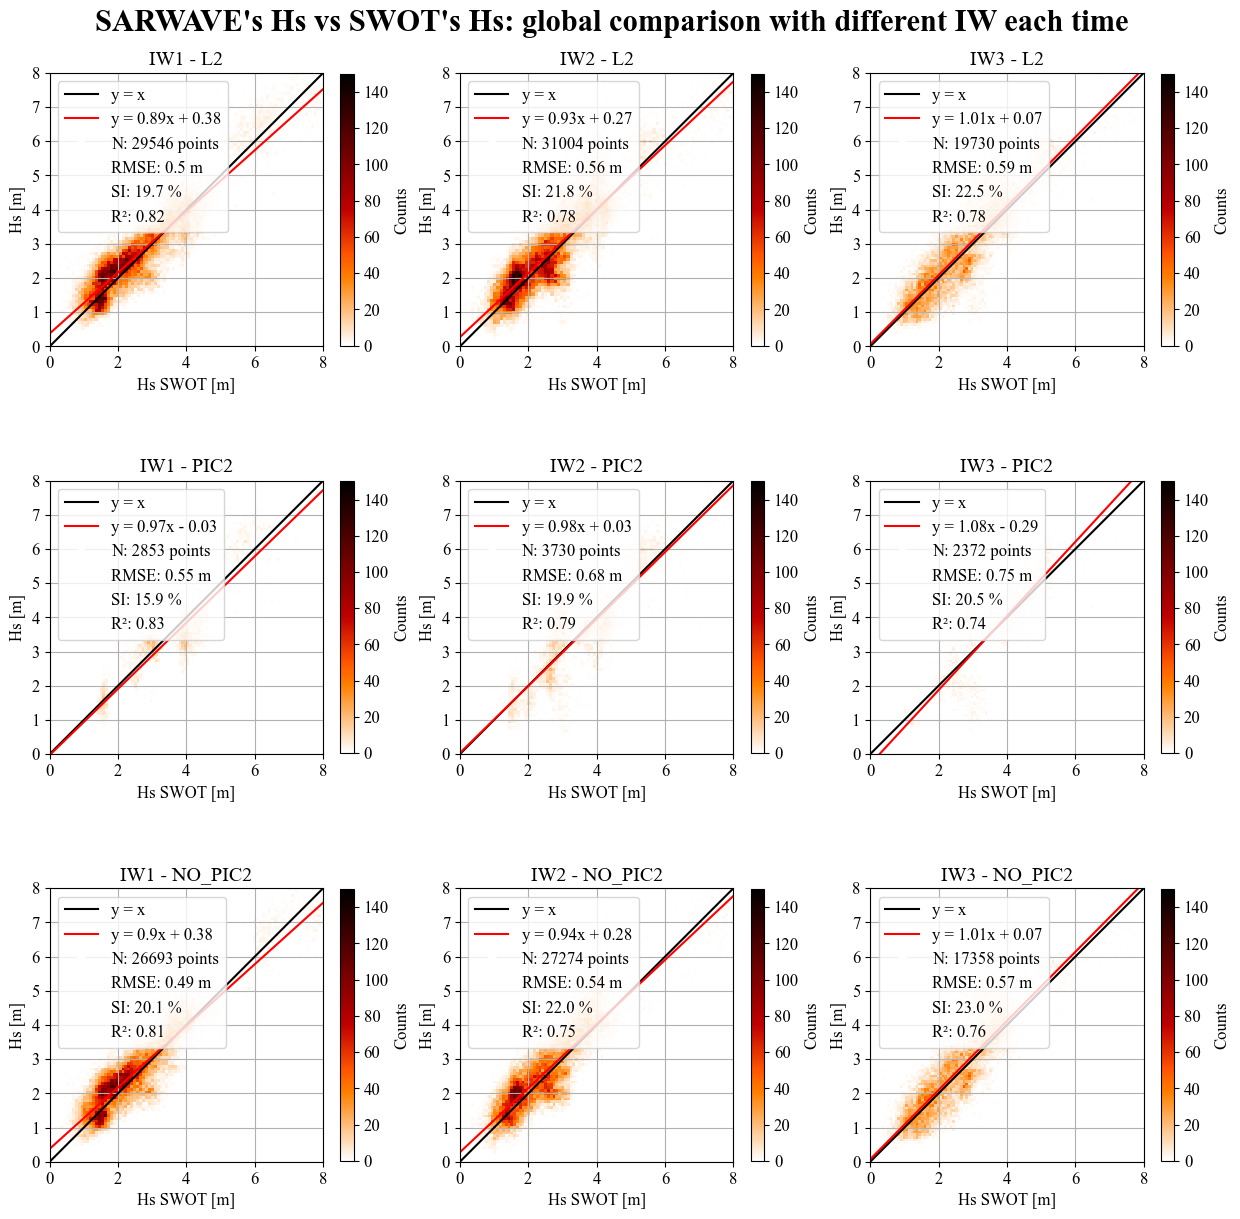

In [20]:
df_hs_iw = pd.read_csv("G_df/df_hs_with_iw_files.csv")
#df_hs_iw = pd.read_csv("df_hs_filtered.csv")

# Removing close to zero values
df_hs_iw = df_hs_iw.loc[df_hs_iw["hs_swot_on_iw"] >= 0.3]
conf_rate_min = -0.5
df_hs_iw = df_hs_iw.loc[df_hs_iw["conf_iw"] >= conf_rate_min]


iwi = "iw3"

fig, ax = plt.subplots(3,3, figsize = (15,15))

names = ["ALL FILES", "PIC2", ]

for k, SWOT_EXT in enumerate(["L2", "PIC2", "NO_PIC2"]):

    if SWOT_EXT != "NO_PIC2":
        df_hs_EXT = df_hs_iw.loc[df_hs_iw["swot_file"].str.contains(f"{SWOT_EXT}", na=False)]
    else:
        df_hs_EXT = df_hs_iw.loc[~df_hs_iw["swot_file"].str.contains(f"{SWOT_EXT[3:]}", na=False)]

    
    for i, iwi in enumerate(["iw1", "iw2", "iw3"]):
    
        df_hs_iw_i = df_hs_EXT.loc[df_hs_EXT["iw_file"].str.contains(f"{iwi}")]
            
        all_hs_swot = df_hs_iw_i["hs_swot_on_iw"].values
        all_hs_iw = df_hs_iw_i["hsml_iw"].values
        
        
        x_obs, y_obs = all_hs_swot, all_hs_iw
    
        RMSE = round(np.sqrt(np.mean((x_obs-y_obs)**2)),2)
    
        #y_obs_2 = MEAN_HSML_CONFIDENT_clean
        
        #plt.scatter(x_obs, y_obs, color="red", marker = "x")
        #plt.scatter(x_obs, y_obs_2, color="green", marker = "x")
        
        # DENSITY SCATTERPLOT REPLACEMENT
        _, _, _, imi = ax[k,i].hist2d(x_obs, y_obs, bins=100, cmap='gist_heat_r',  vmin=0, vmax=150)
        fig.colorbar(imi, ax=ax[k,i], orientation='vertical', label='Counts', shrink=0.8)
    
        
        x_id, y_id = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)
        
        ax[k,i].plot(x_id, y_id, color="black", label="y = x")
        
        coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
        a, b = coeffs[0], coeffs[1]
    
        y_pred = a*x_obs+b
        R2 = round(1 - np.sum((y_obs - y_pred)**2) / np.sum((y_obs - np.mean(y_obs))**2), 2)
    
        N = x_obs.shape[0]
    
        SI = round(100* RMSE / np.mean(y_obs), 1)


        
        if b > 0:
            ax[k,i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x + {round(b,2)}")
        else: 
            ax[k,i].plot(x_id, a*x_id+b,color="red",label=f"y = {round(a,2)}x - {round(abs(b),2)}")
    
    
        ax[k,i].scatter(-1,-1, color="white", label=f"N: {N} points")    
        ax[k,i].scatter(-1,-1, color="white", label=f"RMSE: {RMSE} m")
        ax[k,i].scatter(-1,-1, color="white", label=f"SI: {SI} %")
        ax[k,i].scatter(-1,-1, color="white", label=f"R²: {R2}")
    
    
        ax[k,i].grid()
        ax[k,i].axis('scaled')
        ax[k,i].set_xlim(0,8)
        ax[k,i].set_ylim(0,8)
        ax[k,i].set_title(f"IW{iwi[-1]} - {SWOT_EXT}")
        #fig.text(0.5, 0.875, " Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted), ha='center', fontsize=11)
        ax[k,i].set_xlabel("Hs SWOT [m]")
        ax[k,i].set_ylabel(f"Hs [m]")
        #plt.xlim(min_xx,max_xx)
        #plt.ylim(min_xx,max_xx)
        #plt.xlim(hs_min,hs_max)
        #plt.ylim(hs_min,hs_max)
        ax[k,i].legend(loc="upper left")

plt.suptitle(x=0.5, y=0.9, t=f"SARWAVE's Hs vs SWOT's Hs: global comparison with different IW each time", fontproperties=font_bold, fontsize = 22)# \n Start IW: {} --- End IW: {} \n Start SWOT: {} --- End SWOT: {} \n ".format(pretitle, dt_ini_min.strftime('%d/%m/%Y %H:%M:%S'), dt_end_max.strftime('%d/%m/%Y %H:%M:%S'), t_ini_swot_formatted, t_end_swot_formatted))
plt.savefig("output_images/General_comparison_images/coloc_scatter_plot_iw_different_swot_versions.png")
plt.show()

# Plotting on the world map some statistics

100%|██████████| 170/170 [00:04<00:00, 42.01it/s]


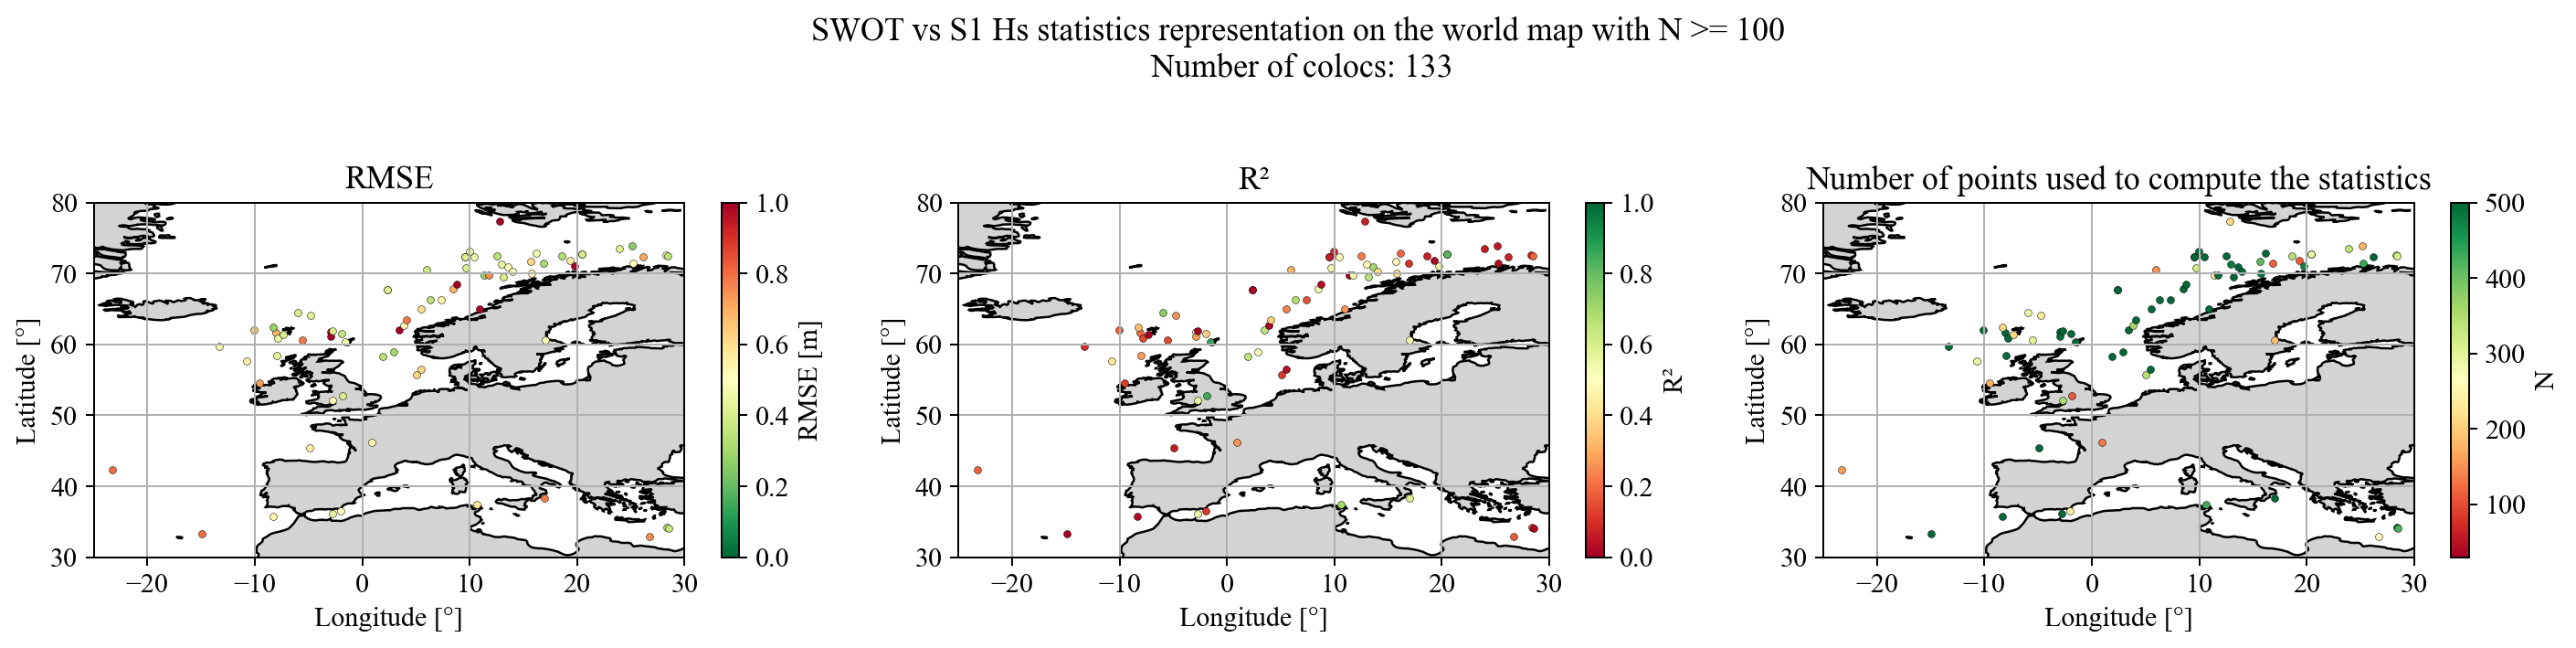

In [21]:
df_hs = pd.read_csv("G_df/df_hs_with_iw_files.csv")
df_hs_no_0 = df_hs.loc[df_hs["hs_swot_on_iw"] >= 0.3]


fig, ax = plt.subplots(1,3, figsize = (16,4),dpi=180)

n_big_cases = 0

for swot_file in tqdm(np.unique(df_hs_no_0["swot_file"])):
    df_hs_no_0_i = df_hs_no_0.loc[df_hs_no_0["swot_file"] == swot_file]

    all_hs_swot = df_hs_no_0_i["hs_swot_on_iw"].values
    all_hs_iw = df_hs_no_0_i["hsml_iw"].values
    
    
    x_obs, y_obs = all_hs_swot, all_hs_iw
    #y_obs_2 = MEAN_HSML_CONFIDENT_clean
    
    coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
    a, b = coeffs[0], coeffs[1]


    RMSE = round(np.sqrt(np.mean((x_obs-y_obs)**2)),2)

    y_pred = a*x_obs+b
    R2 = round(1 - np.sum((y_obs - y_pred)**2) / np.sum((y_obs - np.mean(y_obs))**2), 2)

    N = x_obs.shape[0]

    SI = round(100* RMSE / np.mean(y_obs), 1)
  
    #ds_swot = xr.open_dataset(swot_file)
    lon_map_min, lon_map_max, lat_map_min, lat_map_max = df_hs_no_0_i["lon_map_min"].values[0], df_hs_no_0_i["lon_map_max"].values[0], df_hs_no_0_i["lat_map_min"].values[0], df_hs_no_0_i["lat_map_max"].values[0]
    #ds_swot, t_ini_swot_formatted, t_end_swot_formatted = st.format_ds_swot(ds_swot, lon_map_min, lon_map_max, lat_map_min, lat_map_max, untrustable_hs=20, kernel_size_nan=3, step_to_crop_at_edges=2)

    lon0, lat0 = (lon_map_min + lon_map_max) / 2, (lat_map_min + lat_map_max) / 2

    N_threshold = 100
    #print(N)
    if N >= N_threshold:
        #print("N:", N)
        n_big_cases += 1 
        #print("n_big_cases:", n_big_cases)
        im0 = ax[0].scatter(lon0,lat0,s=10, c=RMSE, vmin=0,vmax=1, cmap="RdYlGn_r", edgecolors="black",linewidths=0.2)
        im1 = ax[1].scatter(lon0,lat0,s=10, c=R2, vmin=0,vmax=1, cmap="RdYlGn", edgecolors="black",linewidths=0.2)
        im2 = ax[2].scatter(lon0,lat0,s=10, c=N, vmin=30,vmax=500, cmap="RdYlGn", edgecolors="black",linewidths=0.2)
        #im2 = ax[2].scatter(lon0,lat0,s=10, c=np.sqrt(RMSE**2 + (1-R2)**2), vmin=0,vmax=1, cmap="RdYlGn_r")


ax[0].set_title("RMSE")
fig.colorbar(im0, ax=ax[0], label="RMSE [m]")

ax[1].set_title("R²")
fig.colorbar(im1, ax=ax[1], label="R²")

ax[2].set_title("Number of points used to compute the statistics")
fig.colorbar(im2, ax=ax[2], label="N")

#ax[2].set_title(r"$\sqrt{RMSE² + (1-R²)²}$")
#fig.colorbar(im2, ax=ax[2], label=r"$\sqrt{RMSE² + (1-R²)²}$")
zoom_agulhas = False
zoom_europe = True

for k in range(3):
    sf_world = shp.Reader(r"data/shapefiles/ne_50m_coastline/ne_50m_coastline.shp") 
    st.show_shp(ax[k],sf_world, zorder=0, color='lightgrey')
    ax[k].grid()
    ax[k].set_xlabel("Longitude [°]")
    ax[k].set_ylabel("Latitude [°]")
    if zoom_agulhas:
        ax[k].set_xlim(15, 45)
        ax[k].set_ylim(-40, -20)
    elif zoom_europe:
        ax[k].set_xlim(-25, 30)
        ax[k].set_ylim(30, 80)


plt.suptitle(f"SWOT vs S1 Hs statistics representation on the world map with N >= {N_threshold} \n Number of colocs: {n_big_cases} \n")    
plt.tight_layout()

plt.show()
    

100%|██████████| 170/170 [00:04<00:00, 42.20it/s]


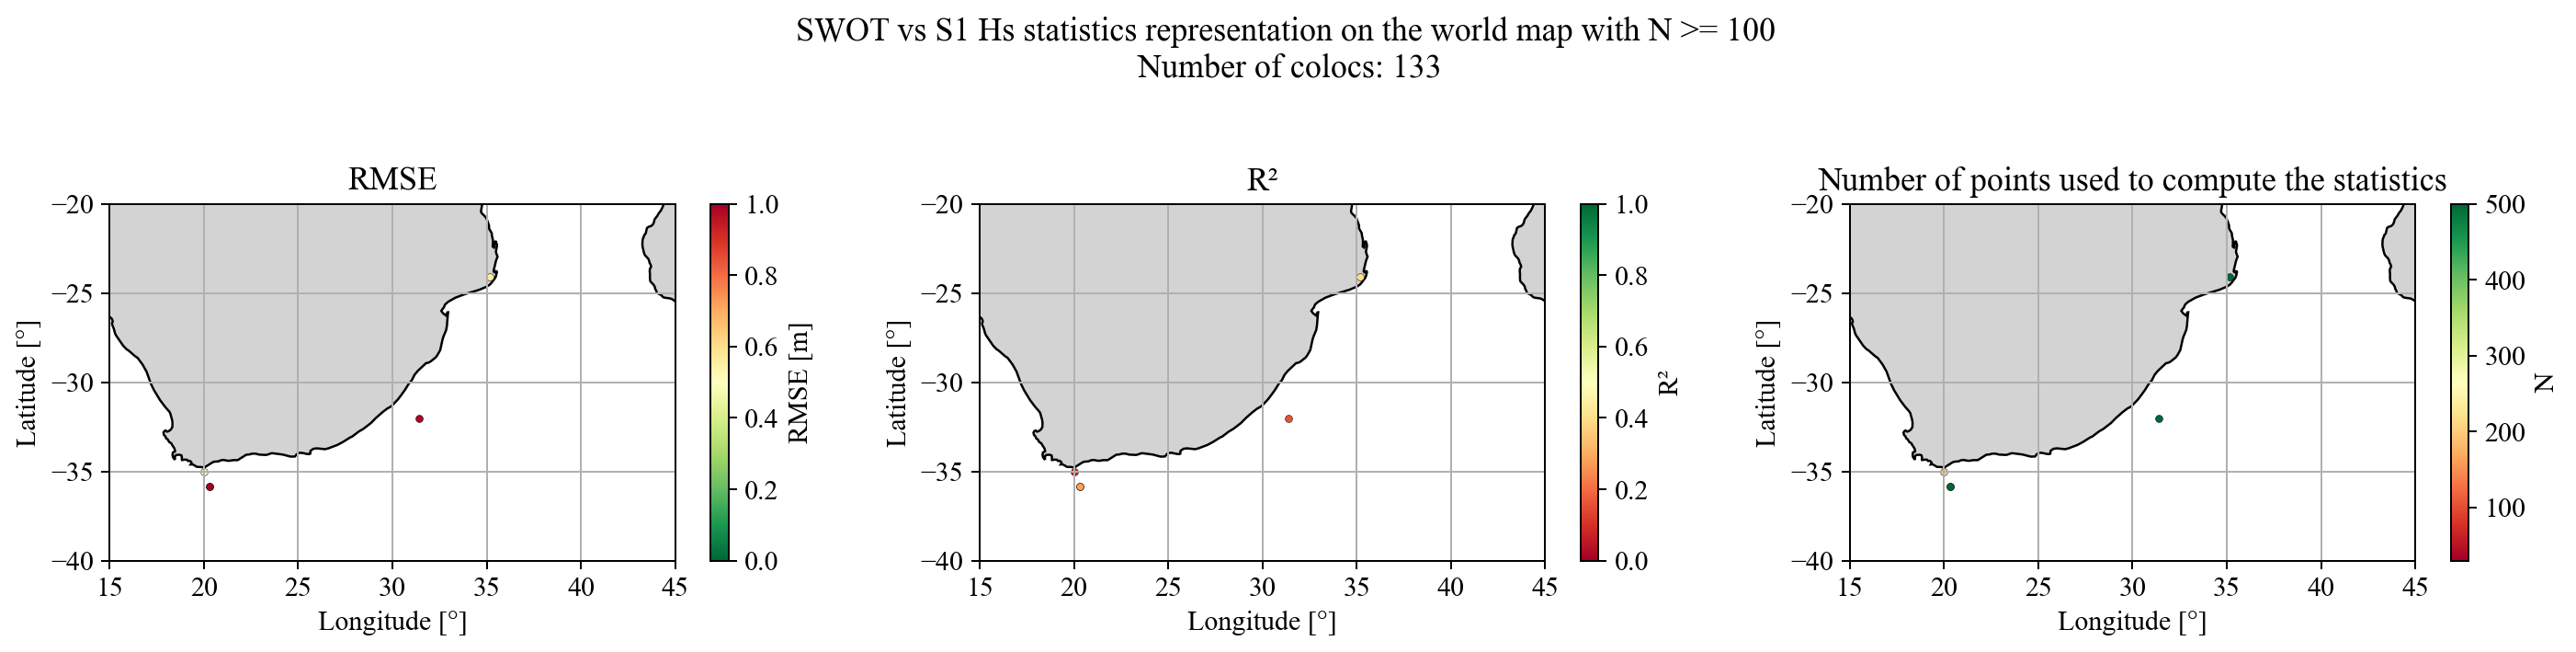

In [22]:
df_hs = pd.read_csv("G_df/df_hs_with_iw_files.csv")
df_hs_no_0 = df_hs.loc[df_hs["hs_swot_on_iw"] >= 0.3]


fig, ax = plt.subplots(1,3, figsize = (16,4),dpi=180)

n_big_cases = 0

for swot_file in tqdm(np.unique(df_hs_no_0["swot_file"])):
    df_hs_no_0_i = df_hs_no_0.loc[df_hs_no_0["swot_file"] == swot_file]

    all_hs_swot = df_hs_no_0_i["hs_swot_on_iw"].values
    all_hs_iw = df_hs_no_0_i["hsml_iw"].values
    
    
    x_obs, y_obs = all_hs_swot, all_hs_iw
    #y_obs_2 = MEAN_HSML_CONFIDENT_clean
    
    coeffs = np.polyfit(x_obs.flatten(), y_obs.flatten(), deg=1) 
    a, b = coeffs[0], coeffs[1]


    RMSE = round(np.sqrt(np.mean((x_obs-y_obs)**2)),2)

    y_pred = a*x_obs+b
    R2 = round(1 - np.sum((y_obs - y_pred)**2) / np.sum((y_obs - np.mean(y_obs))**2), 2)

    N = x_obs.shape[0]

    SI = round(100* RMSE / np.mean(y_obs), 1)
  
    #ds_swot = xr.open_dataset(swot_file)
    lon_map_min, lon_map_max, lat_map_min, lat_map_max = df_hs_no_0_i["lon_map_min"].values[0], df_hs_no_0_i["lon_map_max"].values[0], df_hs_no_0_i["lat_map_min"].values[0], df_hs_no_0_i["lat_map_max"].values[0]
    #ds_swot, t_ini_swot_formatted, t_end_swot_formatted = st.format_ds_swot(ds_swot, lon_map_min, lon_map_max, lat_map_min, lat_map_max, untrustable_hs=20, kernel_size_nan=3, step_to_crop_at_edges=2)

    lon0, lat0 = (lon_map_min + lon_map_max) / 2, (lat_map_min + lat_map_max) / 2

    N_threshold = 100
    #print(N)
    if N >= N_threshold:
        #print("N:", N)
        n_big_cases += 1 
        #print("n_big_cases:", n_big_cases)
        im0 = ax[0].scatter(lon0,lat0,s=10, c=RMSE, vmin=0,vmax=1, cmap="RdYlGn_r", edgecolors="black",linewidths=0.2)
        im1 = ax[1].scatter(lon0,lat0,s=10, c=R2, vmin=0,vmax=1, cmap="RdYlGn", edgecolors="black",linewidths=0.2)
        im2 = ax[2].scatter(lon0,lat0,s=10, c=N, vmin=30,vmax=500, cmap="RdYlGn", edgecolors="black",linewidths=0.2)
        #im2 = ax[2].scatter(lon0,lat0,s=10, c=np.sqrt(RMSE**2 + (1-R2)**2), vmin=0,vmax=1, cmap="RdYlGn_r")


ax[0].set_title("RMSE")
fig.colorbar(im0, ax=ax[0], label="RMSE [m]")

ax[1].set_title("R²")
fig.colorbar(im1, ax=ax[1], label="R²")

ax[2].set_title("Number of points used to compute the statistics")
fig.colorbar(im2, ax=ax[2], label="N")

#ax[2].set_title(r"$\sqrt{RMSE² + (1-R²)²}$")
#fig.colorbar(im2, ax=ax[2], label=r"$\sqrt{RMSE² + (1-R²)²}$")
zoom_agulhas = True
zoom_europe = False

for k in range(3):
    sf_world = shp.Reader(r"data/shapefiles/ne_50m_coastline/ne_50m_coastline.shp") 
    st.show_shp(ax[k],sf_world, zorder=0, color='lightgrey')
    ax[k].grid()
    ax[k].set_xlabel("Longitude [°]")
    ax[k].set_ylabel("Latitude [°]")
    if zoom_agulhas:
        ax[k].set_xlim(15, 45)
        ax[k].set_ylim(-40, -20)
    elif zoom_europe:
        ax[k].set_xlim(-20, 20)
        ax[k].set_ylim(30, 80)


plt.suptitle(f"SWOT vs S1 Hs statistics representation on the world map with N >= {N_threshold} \n Number of colocs: {n_big_cases} \n")    
plt.tight_layout()

plt.show()
    